<a href="https://colab.research.google.com/github/kesiyasuanjohn/Portfolio/blob/main/phrase_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install tensorflow numpy


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [1]:
import json

# Load JSON file
with open('/content/phrase_prediction_dataset.json', 'r') as file:
    data_json = json.load(file)

# Display the content to understand its structure
print(data_json)


FileNotFoundError: [Errno 2] No such file or directory: '/content/phrase_prediction_dataset.json'

In [ ]:
{
    "articles": [
        {"id": 1, "text": "Deep learning is fascinating."},
        {"id": 2, "text": "Natural language processing is a growing field."}
    ]
}


{'articles': [{'id': 1, 'text': 'Deep learning is fascinating.'},
  {'id': 2, 'text': 'Natural language processing is a growing field.'}]}

In [ ]:
print(type(data_json))  # To check if it's a list or a dictionary
print(data_json)        # To inspect the content


<class 'list'>
[{'input': 'I mean', 'predicted_phrases': ['Well, what I was trying to say is', 'Let me clarify that', 'What I meant was']}, {'input': 'You know', 'predicted_phrases': ['I totally understand', 'It makes sense', 'Yeah, I get that']}, {'input': "I'm so excited!", 'predicted_phrases': ["That's awesome!", 'I can feel the excitement!', "I'm glad you're excited!"]}, {'input': 'Goodbye', 'predicted_phrases': ['See you later', 'Bye', 'Take care', 'Goodbye!']}, {'input': 'Goodbye', 'predicted_phrases': ['See you later', 'Bye', 'Take care', 'Goodbye!']}, {'input': 'I mean', 'predicted_phrases': ['Well, what I was trying to say is', 'Let me clarify that', 'What I meant was']}, {'input': "I'm so excited!", 'predicted_phrases': ["That's awesome!", 'I can feel the excitement!', "I'm glad you're excited!"]}, {'input': "I'm feeling sad", 'predicted_phrases': ["I'm sorry to hear that.", 'Do you want to talk about it?', "That's tough."]}, {'input': 'I feel dizzy', 'predicted_phrases': ['I

[{'name': 'data_json',
  'value': "15000 items [{'input': 'I mean…",
  'type': 'list'}]

In [ ]:
sentences = [article['input'] for article in data_json]
print(sentences)

['I mean', 'You know', "I'm so excited!", 'Goodbye', 'Goodbye', 'I mean', "I'm so excited!", "I'm feeling sad", 'I feel dizzy', "I'm frustrated", 'Hi', 'Goodbye', 'I mean', "I'm so excited!", 'I mean', "I'm feeling sad", 'I have a headache', 'How are you?', 'How are you?', 'You know', 'I have a headache', 'How are you?', "I'm so excited!", 'You know', 'I have a headache', 'I feel dizzy', 'I have a headache', 'Hi', 'I have a headache', 'My vision is blurry', 'I feel dizzy', 'Goodbye', 'I mean', "What's up?", "I'm so excited!", "What's up?", 'Goodbye', 'You know', 'Hi', "What's up?", 'My vision is blurry', "I'm so excited!", 'I mean', 'I feel dizzy', "I'm frustrated", 'You know', 'Hi', 'I have a headache', 'I feel dizzy', 'My vision is blurry', 'I mean', 'I have a headache', 'Goodbye', 'I mean', 'My vision is blurry', 'How are you?', "I'm frustrated", 'You know', "I'm feeling sad", 'You know', 'I have a headache', "I'm so excited!", 'I mean', 'You know', 'My vision is blurry', "I'm frust

In [ ]:
# Combine sentences into one string (if needed)
data = "\n".join(sentences)
print(data)


I mean
You know
I'm so excited!
Goodbye
Goodbye
I mean
I'm so excited!
I'm feeling sad
I feel dizzy
I'm frustrated
Hi
Goodbye
I mean
I'm so excited!
I mean
I'm feeling sad
I have a headache
How are you?
How are you?
You know
I have a headache
How are you?
I'm so excited!
You know
I have a headache
I feel dizzy
I have a headache
Hi
I have a headache
My vision is blurry
I feel dizzy
Goodbye
I mean
What's up?
I'm so excited!
What's up?
Goodbye
You know
Hi
What's up?
My vision is blurry
I'm so excited!
I mean
I feel dizzy
I'm frustrated
You know
Hi
I have a headache
I feel dizzy
My vision is blurry
I mean
I have a headache
Goodbye
I mean
My vision is blurry
How are you?
I'm frustrated
You know
I'm feeling sad
You know
I have a headache
I'm so excited!
I mean
You know
My vision is blurry
I'm frustrated
How are you?
What's up?
Hi
My vision is blurry
How are you?
Hi
I mean
Goodbye
I mean
I feel dizzy
I'm feeling sad
My vision is blurry
I have a headache
I mean
I feel dizzy
I mean
I feel dizzy

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit tokenizer on the extracted text
tokenizer.fit_on_texts(sentences)

# Convert sentences into sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Generate input-output pairs for LSTM
input_sequences = []
for seq in sequences:
    for i in range(1, len(seq)):
        input_sequences.append(seq[:i+1])

# Pad sequences to make them uniform in length
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split into input (X) and output (y)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

# Print the shapes of the final inputs and outputs
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (22780, 3)
Shape of y: (22780, 26)


In [ ]:
{
    "data": {
        "documents": [
            {"title": "AI Basics", "content": "Artificial intelligence is everywhere."},
            {"title": "LSTMs", "content": "LSTMs are great for sequential data."}
        ]
    }
}


{'data': {'documents': [{'title': 'AI Basics',
    'content': 'Artificial intelligence is everywhere.'},
   {'title': 'LSTMs', 'content': 'LSTMs are great for sequential data.'}]}}

In [ ]:
# Assuming your list of dictionaries is similar to this (adapt to your actual structure):
# data_json = [{"input": "I mean"}, {"input": "You know"}, ...]

sentences = [article['input'] for article in data_json]  # Accessing 'input' key
print(sentences)

['I mean', 'You know', "I'm so excited!", 'Goodbye', 'Goodbye', 'I mean', "I'm so excited!", "I'm feeling sad", 'I feel dizzy', "I'm frustrated", 'Hi', 'Goodbye', 'I mean', "I'm so excited!", 'I mean', "I'm feeling sad", 'I have a headache', 'How are you?', 'How are you?', 'You know', 'I have a headache', 'How are you?', "I'm so excited!", 'You know', 'I have a headache', 'I feel dizzy', 'I have a headache', 'Hi', 'I have a headache', 'My vision is blurry', 'I feel dizzy', 'Goodbye', 'I mean', "What's up?", "I'm so excited!", "What's up?", 'Goodbye', 'You know', 'Hi', "What's up?", 'My vision is blurry', "I'm so excited!", 'I mean', 'I feel dizzy', "I'm frustrated", 'You know', 'Hi', 'I have a headache', 'I feel dizzy', 'My vision is blurry', 'I mean', 'I have a headache', 'Goodbye', 'I mean', 'My vision is blurry', 'How are you?', "I'm frustrated", 'You know', "I'm feeling sad", 'You know', 'I have a headache', "I'm so excited!", 'I mean', 'You know', 'My vision is blurry', "I'm frust

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the sentences
tokenizer.fit_on_texts(sentences)

# View the word index (mapping of words to integers)
print("Word Index:", tokenizer.word_index)


Word Index: {'i': 1, "i'm": 2, 'you': 3, 'know': 4, 'mean': 5, 'feeling': 6, 'sad': 7, 'feel': 8, 'dizzy': 9, 'have': 10, 'a': 11, 'headache': 12, 'my': 13, 'vision': 14, 'is': 15, 'blurry': 16, 'so': 17, 'excited': 18, 'frustrated': 19, 'how': 20, 'are': 21, 'goodbye': 22, 'hi': 23, "what's": 24, 'up': 25}


In [ ]:
# Convert sentences into sequences of integers
sequences = tokenizer.texts_to_sequences(sentences)

# Display the sequences
print("Sequences:", sequences)


Sequences: [[1, 5], [3, 4], [2, 17, 18], [22], [22], [1, 5], [2, 17, 18], [2, 6, 7], [1, 8, 9], [2, 19], [23], [22], [1, 5], [2, 17, 18], [1, 5], [2, 6, 7], [1, 10, 11, 12], [20, 21, 3], [20, 21, 3], [3, 4], [1, 10, 11, 12], [20, 21, 3], [2, 17, 18], [3, 4], [1, 10, 11, 12], [1, 8, 9], [1, 10, 11, 12], [23], [1, 10, 11, 12], [13, 14, 15, 16], [1, 8, 9], [22], [1, 5], [24, 25], [2, 17, 18], [24, 25], [22], [3, 4], [23], [24, 25], [13, 14, 15, 16], [2, 17, 18], [1, 5], [1, 8, 9], [2, 19], [3, 4], [23], [1, 10, 11, 12], [1, 8, 9], [13, 14, 15, 16], [1, 5], [1, 10, 11, 12], [22], [1, 5], [13, 14, 15, 16], [20, 21, 3], [2, 19], [3, 4], [2, 6, 7], [3, 4], [1, 10, 11, 12], [2, 17, 18], [1, 5], [3, 4], [13, 14, 15, 16], [2, 19], [20, 21, 3], [24, 25], [23], [13, 14, 15, 16], [20, 21, 3], [23], [1, 5], [22], [1, 5], [1, 8, 9], [2, 6, 7], [13, 14, 15, 16], [1, 10, 11, 12], [1, 5], [1, 8, 9], [1, 5], [1, 8, 9], [3, 4], [1, 5], [1, 5], [3, 4], [2, 17, 18], [24, 25], [2, 6, 7], [2, 19], [22], [3, 4

In [ ]:
# Generate input-output pairs
input_sequences = []
for seq in sequences:
    for i in range(1, len(seq)):  # Start from the second word
        input_sequences.append(seq[:i+1])  # Create sub-sequence

# Display some input-output pairs
print("Input Sequences:", input_sequences[:5])


Input Sequences: [[1, 5], [3, 4], [2, 17], [2, 17, 18], [1, 5]]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Find the maximum sequence length
max_seq_len = max([len(seq) for seq in input_sequences])

# Pad sequences to the maximum length
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Display padded sequences
print("Padded Sequences:\n", input_sequences[:5])


Padded Sequences:
 [[ 0  0  1  5]
 [ 0  0  3  4]
 [ 0  0  2 17]
 [ 0  2 17 18]
 [ 0  0  1  5]]


In [ ]:
# Split sequences into input (X) and output (y)
X = input_sequences[:, :-1]  # All words except the last
y = input_sequences[:, -1]   # The last word

# One-hot encode the output labels
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

# Display the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (22780, 3)
Shape of y: (22780, 26)


In [ ]:
# Define the LSTM model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X.shape[1]),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(X, y, epochs=70, batch_size=32, verbose=2)


Epoch 1/70
712/712 - 5s - 7ms/step - accuracy: 0.7833 - loss: 0.3895
Epoch 2/70
712/712 - 6s - 9ms/step - accuracy: 0.7837 - loss: 0.3878
Epoch 3/70
712/712 - 5s - 7ms/step - accuracy: 0.7837 - loss: 0.3878
Epoch 4/70
712/712 - 6s - 8ms/step - accuracy: 0.7837 - loss: 0.3878
Epoch 5/70
712/712 - 10s - 14ms/step - accuracy: 0.7837 - loss: 0.3878
Epoch 6/70
712/712 - 10s - 14ms/step - accuracy: 0.7837 - loss: 0.3877
Epoch 7/70
712/712 - 5s - 7ms/step - accuracy: 0.7831 - loss: 0.3877
Epoch 8/70
712/712 - 6s - 9ms/step - accuracy: 0.7837 - loss: 0.3878
Epoch 9/70
712/712 - 5s - 7ms/step - accuracy: 0.7837 - loss: 0.3877
Epoch 10/70
712/712 - 7s - 9ms/step - accuracy: 0.7820 - loss: 0.3877
Epoch 11/70
712/712 - 8s - 12ms/step - accuracy: 0.7837 - loss: 0.3877
Epoch 12/70
712/712 - 7s - 10ms/step - accuracy: 0.7837 - loss: 0.3878
Epoch 13/70
712/712 - 8s - 12ms/step - accuracy: 0.7837 - loss: 0.3878
Epoch 14/70
712/712 - 7s - 10ms/step - accuracy: 0.7837 - loss: 0.3876
Epoch 15/70
712/712 -

In [ ]:
def predict_next_word(model, tokenizer, seed_text, max_len):
    for _ in range(5):  # Generate 5 words (adjust as needed)
        tokenized_seed = tokenizer.texts_to_sequences([seed_text])
        padded_seed = pad_sequences(tokenized_seed, maxlen=max_len - 1, padding='pre')
        predicted_word_index = model.predict(padded_seed, verbose=0).argmax(axis=1)[0]
        predicted_word = tokenizer.index_word[predicted_word_index]
        seed_text += ' ' + predicted_word
    return seed_text

# Example prediction
seed_phrase = "how are"
print(predict_next_word(model, tokenizer, seed_phrase, max_seq_len))


how are you you headache blurry blurry


In [ ]:
# Save model
model.save("next_phrase_model.h5")

# Save tokenizer
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Load model and tokenizer
from tensorflow.keras.models import load_model
model = load_model("next_phrase_model.h5")
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)


In [ ]:
# Save model in Keras format
model.save("next_phrase_model.keras")


In [ ]:
# Load model in Keras format
from tensorflow.keras.models import load_model
model = load_model("next_phrase_model.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Recompile the model after loading
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.models import load_model
import pickle

# Save model in Keras format
model.save("next_phrase_model.keras")

# Save tokenizer using pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# --- Later when loading the model ---
# Load model
model = load_model("next_phrase_model.keras")

# Recompile the model if necessary
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load tokenizer
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the input and output sequences into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)


Training data shape: (18224, 3)
Validation data shape: (4556, 3)


In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val, verbose=1)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7825 - loss: 0.4036
Validation Loss: 0.40221014618873596
Validation Accuracy: 0.7798507213592529


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), batch_size=64)


Epoch 1/40
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7806 - loss: 0.3850 - val_accuracy: 0.7799 - val_loss: 0.4025
Epoch 2/40
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7753 - loss: 0.3904 - val_accuracy: 0.7799 - val_loss: 0.4024
Epoch 3/40
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7821 - loss: 0.3906 - val_accuracy: 0.7799 - val_loss: 0.4025
Epoch 4/40
285/285 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7822 - loss: 0.3869 - val_accuracy: 0.7799 - val_loss: 0.4023
Epoch 5/40
285/285 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7874 - loss: 0.3824 - val_accuracy: 0.7799 - val_loss: 0.4024
Epoch 6/40
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7824 - loss: 0.3880 - val_accuracy: 0.7799 - val_loss: 0.4025
Epoch 7/40
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7808 - loss: 0.3887 - val_accuracy: 0.7799 - val_loss: 0.4025
Epoch 8/40
285/285 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7847 - loss: 0.3877 - val_accu

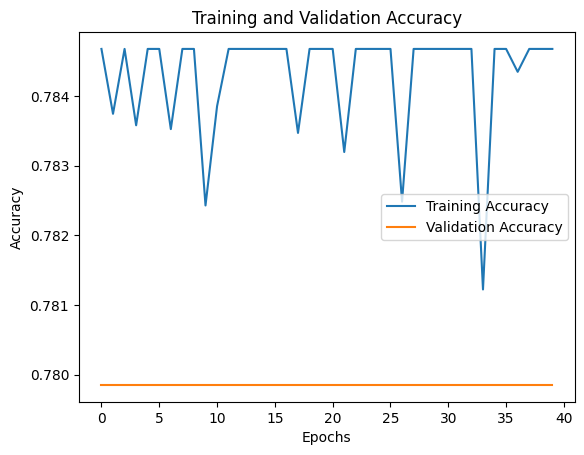

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Pick a sample from the validation set
sample_index = np.random.randint(0, len(X_val))
sample_input = X_val[sample_index].reshape(1, -1)

# Predict the next word
predicted_output = model.predict(sample_input)
predicted_word_index = np.argmax(predicted_output)

# Convert index back to word
predicted_word = tokenizer.index_word[predicted_word_index]

# Print the result
print("Input Sequence:", ' '.join([tokenizer.index_word[i] for i in sample_input[0] if i != 0]))
print("Predicted Next Word:", predicted_word)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Input Sequence: my vision is
Predicted Next Word: blurry


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2

# Calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1 # Add 1 for padding/out-of-vocabulary token

# Define embedding dimension
embedding_dim = 100  # Or any desired dimension

# Assuming max_sequence_len is already defined (e.g., from previous steps)
max_sequence_len = X_train.shape[1]

# Define early_stopping (if not already defined)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_len))
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))  # Dropout after LSTM
model.add(BatchNormalization())
model.add(LSTM(64, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))  # Dropout after LSTM
model.add(Dense(vocab_size, activation='softmax', kernel_regularizer=l2(0.01)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=64, callbacks=[early_stopping])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.6401 - loss: 3.2836 - val_accuracy: 0.7711 - val_loss: 2.1462
Epoch 2/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7811 - loss: 0.8248 - val_accuracy: 0.7799 - val_loss: 0.7354
Epoch 3/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7777 - loss: 0.6996 - val_accuracy: 0.7651 - val_loss: 0.6663
Epoch 4/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7766 - loss: 0.6680 - val_accuracy: 0.7799 - val_loss: 0.6420
Epoch 5/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7815 - loss: 0.6402 - val_accuracy: 0.7799 - val_loss: 0.6310
Epoch 6/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7807 - loss: 0.6260 - val_accuracy: 0.7651 - val_loss: 0.6236
Epoch 7/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7772 - loss: 0.6240 - val_accuracy: 0.7651 - val_loss: 0.6190
Epoch 8/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7816 - loss: 0.6102 - val_accuracy: 0